In [49]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.special
import glob

In [59]:
# get the number of unclassified reads from Kraken2 outputs

InPath="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/2_Metagenomics/1_taxonomy/Kraken/kraken_reports/withDB_standard/"
#InPath="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/2_Metagenomics/1_taxonomy/Kraken/kraken_reports/withDB_plusPf/"

files=glob.glob(InPath+"*.IR.report")
len(files)

93

In [60]:
## color blind colors
cc = {
    'blue':    '#377eb8', 
    'orange':  '#ff7f00',
    'green':   '#4daf4a',
    'pink':    '#f781bf',
    'brown':   '#a65628',
    'purple':  '#984ea3',
    'gray':    '#999999',
    'red':     '#e41a1c',
    'yellow':  '#dede00'
}

my_colors = {'VU': cc["blue"], 'UVA': cc["gray"], 'WUR': cc["red"], 'RUG': cc["orange"], 'NIOO': cc["green"], "Gent": cc["purple"]}


In [61]:
# extract the inforamtion how many reads are unclassified
## from the first two rows

sample=[]
inst=[]
treat=[]
wee=[]
rrep=[]

firstLine=[]
secondLine=[]

uncla_reads = []
cla_reads = []

for i in range(len(files)):
    
    a = files[i].split('/')
    aa=a[-1].split('_')[0:4]
    sample.append(aa)

    inst.append(aa[0])
    treat.append(aa[1])
    wee.append(aa[2])
    rrep.append(aa[3])
    
    with open(files[i]) as input_file:
        head = [next(input_file) for _ in range(2)]
        
    first=str(head[0]).split('\t')
    second=str(head[1]).split('\t')

    # write to a list
    firstLine.append(first)
    secondLine.append(second)

    # Get the numbers out:
    if first[-1] == 'unclassified\n':
        uncla_reads.append(first[1])
    if second[-1] == 'root\n':
        cla_reads.append(second[1])

print(uncla_reads)

['1608691', '286598', '3048926', '764860', '1077952', '3082373', '2413043', '2541175', '353645', '1049266', '366862', '1387614', '1518459', '4501318', '473064', '3083541', '1354306', '967543', '898669', '484624', '943529', '2411475', '2592885', '2305985', '3291505', '290232', '1073993', '729242', '662808', '2059717', '478589', '377833', '338672', '428778', '734951', '638490', '2134460', '442764', '2367104', '772295', '342529', '4872886', '524436', '713178', '2489451', '2689107', '1021943', '1109906', '1303784', '824556', '740173', '3741489', '2973969', '1268048', '2708061', '416947', '498775', '549826', '1731125', '356559', '1496715', '1161940', '657307', '824132', '1897718', '2083261', '307037', '2851870', '1074748', '643502', '1062514', '504818', '1064786', '1756326', '471945', '258735', '1286549', '2791352', '1817694', '1944052', '1888737', '977151', '315272', '369483', '1063944', '460848', '294905', '1246894', '682212', '1796998', '918842', '1555101', '933706']


In [62]:
# make a data frame because plotting could get easier :)

# get the relative proportion of unclassified reads:
all_reads = np.array(uncla_reads).astype(int)+2*np.array(cla_reads).astype(int)
uncla_rel = np.divide(np.array(uncla_reads).astype(int),all_reads)
df = pd.DataFrame(
    {
        'institution': inst,
        'treatment': treat,
        'week': wee,
        'rep': rrep,
        'uncla_reads': np.array(uncla_reads).astype(int),
        'cla_reads': np.array(cla_reads).astype(int), 
        'allReads': all_reads,
        'uncla_rel': uncla_rel,
    }
)
df


,institution,treatment,week,rep,uncla_reads,cla_reads,allReads,uncla_rel
0,NIOO,A00,1,1,1608691,42724595,87057881,0.018478
1,UVA,anc,0,3,286598,1718153,3722904,0.076982
2,NIOO,M00,1,1,3048926,84646101,172341128,0.017691
3,VU,bn5,15,4,764860,5450454,11665768,0.065564
4,VU,bn5,0,5,1077952,16910433,34898818,0.030888
...,...,...,...,...,...,...,...,...
88,VU,bb,1,5,682212,6798491,14279194,0.047777
89,VU,bn5,15,5,1796998,29550012,60897022,0.029509
90,Gent,bb,1,2,918842,8530197,17979236,0.051106
91,WUR,bleach,15,2,1555101,25652263,52859627,0.029419


,institution,treatment,week,rep,uncla_reads,cla_reads,allReads,uncla_rel
0,NIOO,A00,1,1,1608691,42724595,87057881,0.018478
1,UVA,anc,0,3,286598,1718153,3722904,0.076982
2,NIOO,M00,1,1,3048926,84646101,172341128,0.017691
3,VU,bn5,15,4,764860,5450454,11665768,0.065564
4,VU,bn5,0,5,1077952,16910433,34898818,0.030888
...,...,...,...,...,...,...,...,...
88,VU,bb,1,5,682212,6798491,14279194,0.047777
89,VU,bn5,15,5,1796998,29550012,60897022,0.029509
90,Gent,bb,1,2,918842,8530197,17979236,0.051106
91,WUR,bleach,15,2,1555101,25652263,52859627,0.029419


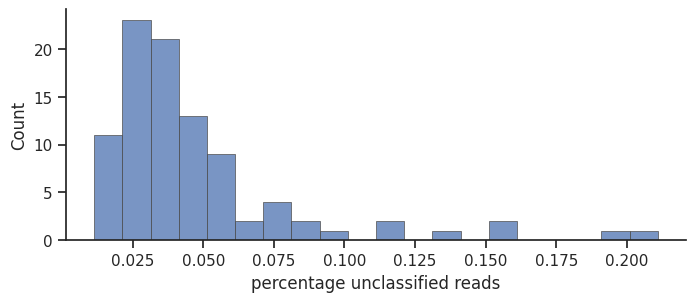

In [67]:
# plot histogram of relative number of unclassified reads

fig1, ax1 = plt.subplots(figsize=(8,3))

sns.set_theme(style="ticks")

sns.despine(fig1)

sns.histplot(
    df,
    x="uncla_rel",
    edgecolor=".3",
    linewidth=.5,
    binwidth=0.01,
)
ax1.set_xlabel('percentage unclassified reads')

## which samples highest
df

<Axes: xlabel='uncla_reads', ylabel='Count'>

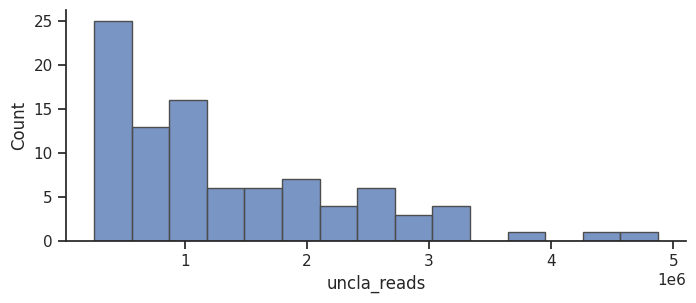

In [64]:
fig2, ax2 = plt.subplots(figsize=(8,3))

sns.set_theme(style="ticks")

sns.despine(fig2)

sns.histplot(
    df,
    x='uncla_reads',
    edgecolor=".3",
    binwidth=300000
)

In [65]:
# get the samples with the highest unclassified reads proportion

df.sort_values('uncla_rel')[0:20]
df

,institution,treatment,week,rep,uncla_reads,cla_reads,allReads,uncla_rel
0,NIOO,A00,1,1,1608691,42724595,87057881,0.018478
1,UVA,anc,0,3,286598,1718153,3722904,0.076982
2,NIOO,M00,1,1,3048926,84646101,172341128,0.017691
3,VU,bn5,15,4,764860,5450454,11665768,0.065564
4,VU,bn5,0,5,1077952,16910433,34898818,0.030888
...,...,...,...,...,...,...,...,...
88,VU,bb,1,5,682212,6798491,14279194,0.047777
89,VU,bn5,15,5,1796998,29550012,60897022,0.029509
90,Gent,bb,1,2,918842,8530197,17979236,0.051106
91,WUR,bleach,15,2,1555101,25652263,52859627,0.029419


# Null-Hypothesis:

- I would assume that the proportion of unclassified reads to all reads is the same across all samples. Why? Because to find unclassified ones if they are systematic (degregaded DNA, human contamination) it should depend only on the DNA amount.N
- So: assumption: number of unclassified reads is linear with the number of all reads, so that slope is the proportion

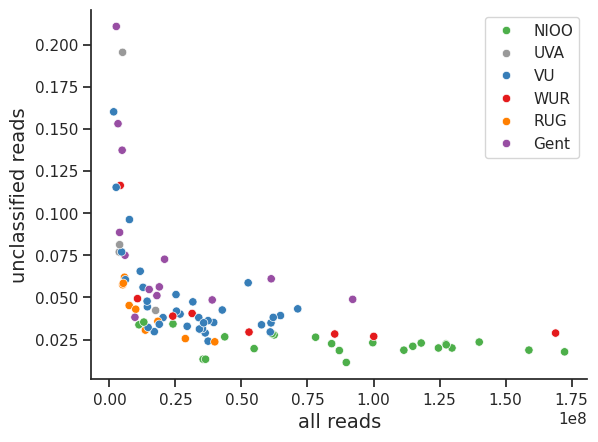

In [66]:
# plot the correlation between peak fraction and % mapped reads
fig3, ax3 = plt.subplots()
#ax.set_yscale('log')

sns.scatterplot(df, x="allReads", y="uncla_rel", hue="institution", palette=my_colors)

ax3.set_xlabel('all reads', fontsize=14)
ax3.set_ylabel('unclassified reads', fontsize=14)
plt.legend()
sns.despine()

plt.savefig('/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/2_Metagenomics/1_taxonomy/plots/' + 'UnclassReads_AllReads_DBstandard.png',
            dpi=300)

# Fazit:
- there are 2(-3) institutions that deviate most from the linear null hypothesis
- Gent (and VU a few samples): has more unclassified reads than on overage
- NIOO has the lowest number of relative unclassified reads (even though it has the highest total number of unclassified reads)

- **I think that this means that there is an additional microbial signature that is "hidden" in the unclassified reads -> maybe fungal information**